In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Drazenoic, Mr. Jozef",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df=pd.DataFrame(train)


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

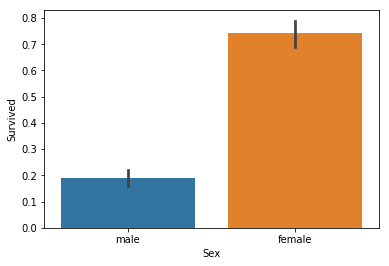

In [9]:
sns.barplot(df['Sex'],df['Survived'])


In [10]:
print('Percentage of females surviving',df['Survived'][df['Sex']=='female'].value_counts(normalize=True)[1]*100)
print('Percentage of males surviving',df['Survived'][df['Sex']=='male'].value_counts(normalize=True)[1]*100)
print('So likely females are going to survive')

Percentage of females surviving 74.20382165605095
Percentage of males surviving 18.890814558058924
So likely females are going to survive


Percentage of pclass = 1 survived 62.96296296296296
Percentage of pclass = 2 survived 47.28260869565217
Percentage of pclass = 3 survived 24.236252545824847


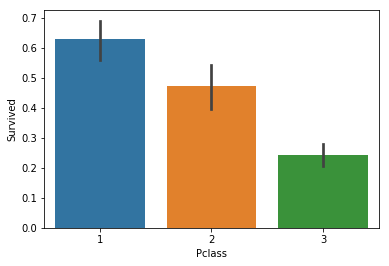

In [11]:
sns.barplot(df['Pclass'],df['Survived'])

print('Percentage of pclass = 1 survived',df['Survived'][df['Pclass']==1].value_counts(normalize =True)[1]*100)
print('Percentage of pclass = 2 survived',df['Survived'][df['Pclass']==2].value_counts(normalize =True)[1]*100)
print('Percentage of pclass = 3 survived',df['Survived'][df['Pclass']==3].value_counts(normalize =True)[1]*100)

Percentage of SibSp = 0 survived 34.53947368421053
Percentage of SibSp = 1 survived 53.588516746411486
Percentage of SibSp = 2 survived 46.42857142857143
Percentage of SibSp = 3 survived 25.0
Percentage of SibSp = 4 survived 16.666666666666664


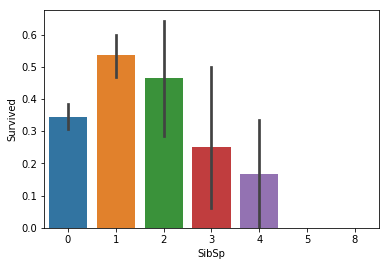

In [12]:
sns.barplot(df['SibSp'],df['Survived'])
print('Percentage of SibSp = 0 survived',df['Survived'][df['SibSp']==0].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 1 survived',df['Survived'][df['SibSp']==1].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 2 survived',df['Survived'][df['SibSp']==2].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 3 survived',df['Survived'][df['SibSp']==3].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 4 survived',df['Survived'][df['SibSp']==4].value_counts(normalize=True)[1]*100)

Percentage of parch = 0 survived 34.365781710914455
Percentage of parch = 1 survived 55.08474576271186
Percentage of parch = 2 survived 50.0
Percentage of parch = 3 survived 60.0
Percentage of parch = 5 survived 20.0


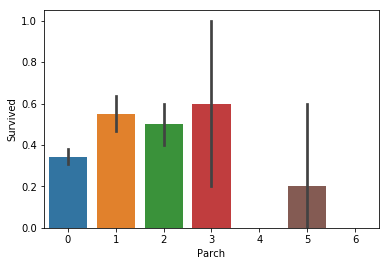

In [13]:
sns.barplot(df['Parch'],df['Survived'])
print('Percentage of parch = 0 survived',df['Survived'][df['Parch']==0].value_counts(normalize=True)[1]*100)
print('Percentage of parch = 1 survived',df['Survived'][df['Parch']==1].value_counts(normalize=True)[1]*100)
print('Percentage of parch = 2 survived',df['Survived'][df['Parch']==2].value_counts(normalize=True)[1]*100)
print('Percentage of parch = 3 survived',df['Survived'][df['Parch']==3].value_counts(normalize=True)[1]*100)
print('Percentage of parch = 5 survived',df['Survived'][df['Parch']==5].value_counts(normalize=True)[1]*100)


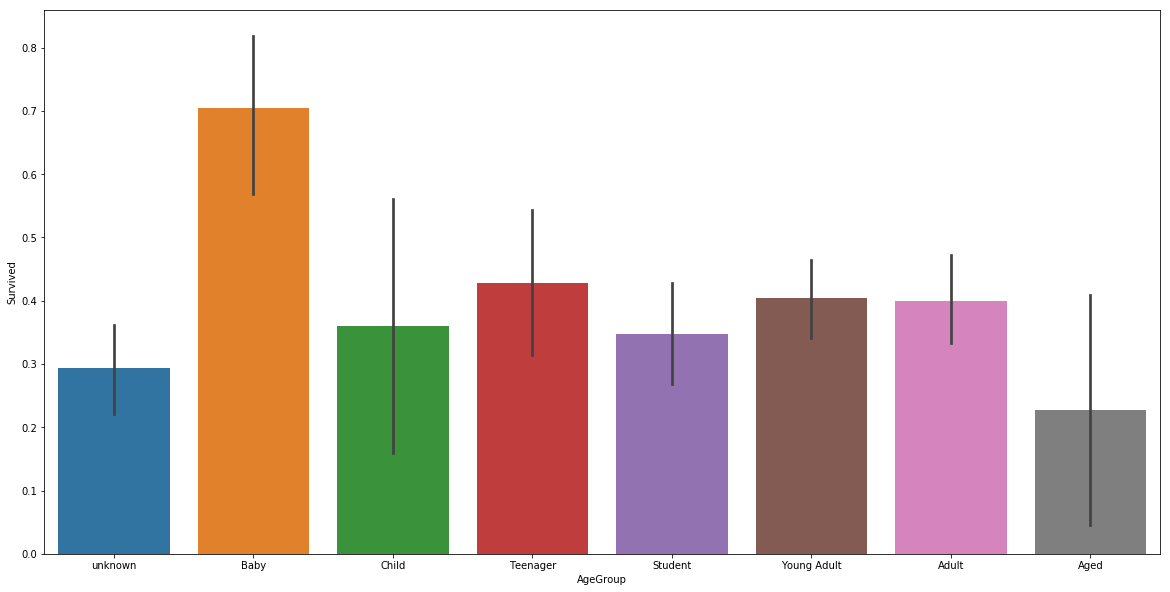

In [14]:
df['Age']= df['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Aged']
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)
plt.figure(figsize=(20,10))
sns.barplot(df['AgeGroup'],df['Survived'])


Percentage of cabin = 0 29.985443959243085
Percentage of cabin = 1 66.66666666666666


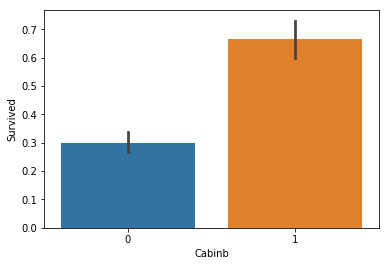

In [15]:
df['Cabinb']=(df['Cabin'].notnull().astype('int'))
test['Cabinb']=(test['Cabin'].notnull().astype('int'))

sns.barplot(df['Cabinb'],df['Survived'])

print('Percentage of cabin = 0',df['Survived'][df['Cabinb']==0].value_counts(normalize= True)[1]*100)
print('Percentage of cabin = 1',df['Survived'][df['Cabinb']==1].value_counts(normalize= True)[1]*100)

In [16]:
#DATA CLEANING

In [17]:
df= df.drop(['Ticket'], axis=1)

In [18]:
df=df.drop(['Cabin'], axis=1)

In [19]:
test=test.drop(['Ticket'],axis=1)
test=test.drop(['Cabin'],axis=1)


In [20]:
print('No of people embarking in Southampton : ')
s=df[df['Embarked']=='S'].shape[0]
print(s)
print('No of people embarking in cherbourg : ')
s=df[df['Embarked']=='C'].shape[0]
print(s)
print('No of people embarking in queenstown : ')
s=df[df['Embarked']=='Q'].shape[0]
print(s)


No of people embarking in Southampton : 
644
No of people embarking in cherbourg : 
168
No of people embarking in queenstown : 
77


In [21]:
df=df.fillna({'Embarked':'S'})

In [22]:
df['Embarked'].isnull().any()


False

In [23]:
for data in df,test:
    data['Title']=data['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for data in df,test:
    data['Title']=data['Title'].replace(['Lady','Capt','Col','Don','Dr','Rev','Major','Jonkheer','Dona'],'Important')
    data['Title']=data['Title'].replace(['Countess','Sir'],'Royal')
    data['Title']=data['Title'].replace(['Mlle','Ms'],'Miss')
    data['Title']=data['Title'].replace(['Mme'],'Mrs')

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Important,0.285714
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Royal,1.000000


In [25]:
title_map={"Mr":1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Important':6}
for data in df,test:
    data['Title']=data['Title'].map(title_map)
    data['Title']=data['Title'].fillna(0)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabinb,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [26]:
df=df.drop(['Name'],axis=1)

In [27]:
test=test.drop(['Name'],axis=1)

In [28]:
df=df.drop(['Fare'],axis=1)
test=test.drop(['Fare'],axis=1)

In [29]:
sex_map={'male':0,'female':1}
for data in df,test:
    data['Sex']=data['Sex'].map(sex_map)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,1,0,3,0,22.0,1,0,S,Student,0,1
1,2,1,1,1,38.0,1,0,C,Adult,1,3
2,3,1,3,1,26.0,0,0,S,Young Adult,0,2
3,4,1,1,1,35.0,1,0,S,Young Adult,1,3
4,5,0,3,0,35.0,0,0,S,Young Adult,0,1


In [30]:
embark_map={'S':1,'C':2,'Q':3}
for data in df,test:
    data['Embarked']=data['Embarked'].map(embark_map)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,1,0,3,0,22.0,1,0,1,Student,0,1
1,2,1,1,1,38.0,1,0,2,Adult,1,3
2,3,1,3,1,26.0,0,0,1,Young Adult,0,2
3,4,1,1,1,35.0,1,0,1,Young Adult,1,3
4,5,0,3,0,35.0,0,0,1,Young Adult,0,1


In [31]:
age_map={'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Aged':7,'unknown' : 8}

for data in df,test:
    data['AgeGroup']=data['AgeGroup'].map(age_map)
df.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,1,0,3,0,22.0,1,0,1,4,0,1
1,2,1,1,1,38.0,1,0,2,6,1,3
2,3,1,3,1,26.0,0,0,1,5,0,2
3,4,1,1,1,35.0,1,0,1,5,1,3
4,5,0,3,0,35.0,0,0,1,5,0,1


In [32]:
df=df.drop(['Age'],axis=1)

In [33]:
test=test.drop(['Age'],axis=1)

In [34]:
df.head(6)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,1,0,3,0,1,0,1,4,0,1
1,2,1,1,1,1,0,2,6,1,3
2,3,1,3,1,0,0,1,5,0,2
3,4,1,1,1,1,0,1,5,1,3
4,5,0,3,0,0,0,1,5,0,1
5,6,0,3,0,0,0,3,8,0,1


In [35]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,892,3,0,0,0,3,5,0,1
1,893,3,1,1,0,1,6,0,3
2,894,2,0,0,0,3,7,0,1
3,895,3,0,0,0,1,5,0,1
4,896,3,1,1,1,1,4,0,3


In [36]:
#TRAINING THE MODEL
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
SibSp          False
Parch          False
Embarked       False
AgeGroup       False
Cabinb         False
Title          False
dtype: bool

In [37]:
from sklearn.model_selection import train_test_split
X=df.drop(['Survived','PassengerId'],axis=1)
Y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [38]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression().fit(X_train,y_train)
y_pred= lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy using logistic Regression is : ',round(accuracy*100,2))

The accuracy using logistic Regression is :  78.92


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#using SVM

from sklearn.svm import SVC
svc=SVC().fit(X_train,y_train)
y_pred= svc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy using SVM is : ',round(accuracy*100,2))

The accuracy using SVM is :  81.17


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
#using neural network

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=[10,10,10],solver='lbfgs',random_state=1).fit(X_train,y_train)
y_pred=mlp.predict(X_test)
accuracy= accuracy_score(y_test,y_pred)
print('The accuracy using neural network is : ',round(accuracy*100,2))


The accuracy using neural network is :  82.06


In [41]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Cabinb,Title
0,892,3,0,0,0,3,5,0,1
1,893,3,1,1,0,1,6,0,3
2,894,2,0,0,0,3,7,0,1
3,895,3,0,0,0,1,5,0,1
4,896,3,1,1,1,1,4,0,3


In [42]:
ids= test['PassengerId']
test=test.drop(['PassengerId'],axis=1)

In [43]:

predictions=mlp.predict(test)

output= pd.DataFrame({'PassengerId' : ids,'Survived':predictions})
output.to_csv('Submission.csv',index=False)